In [1]:
#Basic libraries
import pandas as pd
import numpy as np 
import numpy as np

#Vizualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling Tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

from datetime import date

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

 
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#Custom functions
from env import host, user, password #Database credentials
import wrangle3



In [ ]:
#jupyter nbextension enable --py gmaps


In [2]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test= wrangle3.wrangle()

In [3]:
train.shape

(36384, 33)

In [4]:
X_train.shape

(36384, 63)

In [5]:
train.head()

,Unnamed: 0,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline
21580,21580,11204960,-0.015033,3.0,4.0,2000.0,6037.0,34.561695,-118.082751,6999.0,40227.0,3101.0,97328.0,1987.0,104877.0,131090.0,26213.0,2623.93,Los_Angeles,30.0,0.200,2.001625,0.160675,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913
32781,32781,14323862,0.158456,6.0,6.0,7393.0,6059.0,33.601524,-117.845231,24000.0,40009.0,1286.0,96975.0,1995.0,1556016.0,2449943.0,893927.0,29921.84,Orange,22.0,0.200,1.221328,0.550964,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913
33161,33161,12205584,-0.017737,2.0,3.0,1778.0,6037.0,33.966002,-118.298627,4948.0,12447.0,3101.0,96025.0,1936.0,87000.0,347000.0,260000.0,4248.21,Los_Angeles,81.0,0.600,1.224268,0.113590,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913
45785,45785,12078527,0.066846,3.0,4.0,2777.0,6037.0,34.166013,-118.218530,9989.0,45457.0,3101.0,96327.0,1990.0,322342.0,875355.0,553013.0,9603.39,Los_Angeles,27.0,0.200,1.097085,0.229316,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913
45820,45820,14266520,-0.022133,3.0,4.0,1939.0,6059.0,33.706702,-117.898677,6028.0,47568.0,1286.0,97004.0,1971.0,139321.0,327623.0,188302.0,3923.98,Orange,46.0,0.333,1.197712,0.138384,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913


In [6]:
X_validate.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster,size_cluster,price_cluster,area_cluster_la_newer,area_cluster_la_older,area_cluster_northwest_costal,area_cluster_palmdale_landcaster,area_cluster_santa_clarita,area_cluster_se_coast,size_cluster_a,size_cluster_b,size_cluster_c,size_cluster_d,size_cluster_e,size_cluster_f,size_cluster_g,price_cluster_a,price_cluster_b,price_cluster_c,price_cluster_d,price_cluster_e
20430,20430,11304460,3.0,4.0,2334.0,6037.0,34.687739,-118.184182,6631.0,5534.0,3101.0,97319.0,1990.0,173161.0,216450.0,43289.0,3463.67,Los_Angeles,27.0,0.200,1.600217,0.152227,0.2,0.5,74.190660,0.2,6.528276,0.2,0.750000,0,0.017913,0.915288,0.678472,0.333333,0.162402,0.500000,0.008345,0.191176,0.008345,0.196429,0.208052,palmdale_landcaster,f,c,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
36350,36350,14260987,2.0,4.0,1361.0,6059.0,33.729501,-117.905911,7800.0,47568.0,1286.0,97004.0,1960.0,62078.0,382037.0,319959.0,4531.62,Orange,57.0,0.400,1.186173,0.179063,0.2,0.3,45.612050,0.1,41.020385,0.3,0.500000,0,0.017913,0.264110,0.824705,0.166667,0.120134,0.500000,0.009870,0.411765,0.009870,0.107143,0.105502,la_newer,c,d,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
24457,24457,14066920,2.5,4.0,1840.0,6059.0,33.710168,-118.023301,6305.0,25218.0,1286.0,96967.0,1965.0,126210.0,711616.0,585406.0,7920.96,Orange,52.0,0.400,1.113095,0.144743,0.1,0.4,68.592391,0.2,92.847898,0.4,0.625000,0,0.017913,0.250972,0.763016,0.250000,0.112674,0.500000,0.007920,0.375000,0.007920,0.151786,0.155987,la_newer,b,a,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
47718,47718,11236044,2.0,3.0,1244.0,6037.0,34.544534,-118.070681,7040.0,40227.0,3101.0,97328.0,1993.0,114200.0,199000.0,84800.0,3453.14,Los_Angeles,24.0,0.200,1.735246,0.161616,0.2,0.2,91.800643,0.3,12.045455,0.2,0.666667,0,0.017913,0.817972,0.738118,0.166667,0.176186,0.333333,0.008879,0.169118,0.008879,0.166667,0.093170,palmdale_landcaster,b,c,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
46236,46236,11317435,3.0,4.0,2200.0,6037.0,34.680030,-118.243096,7759.0,5534.0,3101.0,97319.0,2005.0,204300.0,273000.0,68700.0,4280.00,Los_Angeles,12.0,0.133,1.567766,0.178122,0.2,0.5,92.863636,0.3,8.854234,0.2,0.750000,0,0.017913,0.910049,0.647512,0.333333,0.159089,0.500000,0.009817,0.080882,0.009817,0.196429,0.193929,palmdale_landcaster,f,c,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [7]:
X_train.head()
#all three clustering added (area, size, price) + one hot encode == getdummies for modeling in the future

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster,size_cluster,price_cluster,area_cluster_la_newer,area_cluster_la_older,area_cluster_northwest_costal,area_cluster_palmdale_landcaster,area_cluster_santa_clarita,area_cluster_se_coast,size_cluster_a,size_cluster_b,size_cluster_c,size_cluster_d,size_cluster_e,size_cluster_f,size_cluster_g,price_cluster_a,price_cluster_b,price_cluster_c,price_cluster_d,price_cluster_e
21580,21580,11204960,3.0,4.0,2000.0,6037.0,34.561695,-118.082751,6999.0,40227.0,3101.0,97328.0,1987.0,104877.0,131090.0,26213.0,2623.93,Los_Angeles,30.0,0.200,2.001625,0.160675,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913,0.829634,0.731775,0.333333,0.203380,0.500000,0.008825,0.213235,0.008825,0.196429,0.172850,palmdale_landcaster,f,c,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
32781,32781,14323862,6.0,6.0,7393.0,6059.0,33.601524,-117.845231,24000.0,40009.0,1286.0,96975.0,1995.0,1556016.0,2449943.0,893927.0,29921.84,Orange,22.0,0.200,1.221328,0.550964,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913,0.177142,0.856593,0.833333,0.123723,0.833333,0.031010,0.154412,0.031010,0.285714,0.741252,se_coast,d,a,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
33161,33161,12205584,2.0,3.0,1778.0,6037.0,33.966002,-118.298627,4948.0,12447.0,3101.0,96025.0,1936.0,87000.0,347000.0,260000.0,4248.21,Los_Angeles,81.0,0.600,1.224268,0.113590,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913,0.424826,0.618331,0.166667,0.124023,0.333333,0.006149,0.588235,0.006149,0.166667,0.149452,la_older,b,d,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
45785,45785,12078527,3.0,4.0,2777.0,6037.0,34.166013,-118.218530,9989.0,45457.0,3101.0,96327.0,1990.0,322342.0,875355.0,553013.0,9603.39,Los_Angeles,27.0,0.200,1.097085,0.229316,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913,0.560745,0.660422,0.333333,0.111039,0.500000,0.012727,0.191176,0.012727,0.196429,0.254743,santa_clarita,f,a,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
45820,45820,14266520,3.0,4.0,1939.0,6059.0,33.706702,-117.898677,6028.0,47568.0,1286.0,97004.0,1971.0,139321.0,327623.0,188302.0,3923.98,Orange,46.0,0.333,1.197712,0.138384,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913,0.248617,0.828507,0.333333,0.121312,0.500000,0.007558,0.330882,0.007558,0.196429,0.166421,se_coast,f,d,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [8]:
train.head()

,Unnamed: 0,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline
21580,21580,11204960,-0.015033,3.0,4.0,2000.0,6037.0,34.561695,-118.082751,6999.0,40227.0,3101.0,97328.0,1987.0,104877.0,131090.0,26213.0,2623.93,Los_Angeles,30.0,0.200,2.001625,0.160675,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913
32781,32781,14323862,0.158456,6.0,6.0,7393.0,6059.0,33.601524,-117.845231,24000.0,40009.0,1286.0,96975.0,1995.0,1556016.0,2449943.0,893927.0,29921.84,Orange,22.0,0.200,1.221328,0.550964,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913
33161,33161,12205584,-0.017737,2.0,3.0,1778.0,6037.0,33.966002,-118.298627,4948.0,12447.0,3101.0,96025.0,1936.0,87000.0,347000.0,260000.0,4248.21,Los_Angeles,81.0,0.600,1.224268,0.113590,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913
45785,45785,12078527,0.066846,3.0,4.0,2777.0,6037.0,34.166013,-118.218530,9989.0,45457.0,3101.0,96327.0,1990.0,322342.0,875355.0,553013.0,9603.39,Los_Angeles,27.0,0.200,1.097085,0.229316,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913
45820,45820,14266520,-0.022133,3.0,4.0,1939.0,6059.0,33.706702,-117.898677,6028.0,47568.0,1286.0,97004.0,1971.0,139321.0,327623.0,188302.0,3923.98,Orange,46.0,0.333,1.197712,0.138384,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913


In [9]:
X_validate.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster,size_cluster,price_cluster,area_cluster_la_newer,area_cluster_la_older,area_cluster_northwest_costal,area_cluster_palmdale_landcaster,area_cluster_santa_clarita,area_cluster_se_coast,size_cluster_a,size_cluster_b,size_cluster_c,size_cluster_d,size_cluster_e,size_cluster_f,size_cluster_g,price_cluster_a,price_cluster_b,price_cluster_c,price_cluster_d,price_cluster_e
20430,20430,11304460,3.0,4.0,2334.0,6037.0,34.687739,-118.184182,6631.0,5534.0,3101.0,97319.0,1990.0,173161.0,216450.0,43289.0,3463.67,Los_Angeles,27.0,0.200,1.600217,0.152227,0.2,0.5,74.190660,0.2,6.528276,0.2,0.750000,0,0.017913,0.915288,0.678472,0.333333,0.162402,0.500000,0.008345,0.191176,0.008345,0.196429,0.208052,palmdale_landcaster,f,c,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
36350,36350,14260987,2.0,4.0,1361.0,6059.0,33.729501,-117.905911,7800.0,47568.0,1286.0,97004.0,1960.0,62078.0,382037.0,319959.0,4531.62,Orange,57.0,0.400,1.186173,0.179063,0.2,0.3,45.612050,0.1,41.020385,0.3,0.500000,0,0.017913,0.264110,0.824705,0.166667,0.120134,0.500000,0.009870,0.411765,0.009870,0.107143,0.105502,la_newer,c,d,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
24457,24457,14066920,2.5,4.0,1840.0,6059.0,33.710168,-118.023301,6305.0,25218.0,1286.0,96967.0,1965.0,126210.0,711616.0,585406.0,7920.96,Orange,52.0,0.400,1.113095,0.144743,0.1,0.4,68.592391,0.2,92.847898,0.4,0.625000,0,0.017913,0.250972,0.763016,0.250000,0.112674,0.500000,0.007920,0.375000,0.007920,0.151786,0.155987,la_newer,b,a,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
47718,47718,11236044,2.0,3.0,1244.0,6037.0,34.544534,-118.070681,7040.0,40227.0,3101.0,97328.0,1993.0,114200.0,199000.0,84800.0,3453.14,Los_Angeles,24.0,0.200,1.735246,0.161616,0.2,0.2,91.800643,0.3,12.045455,0.2,0.666667,0,0.017913,0.817972,0.738118,0.166667,0.176186,0.333333,0.008879,0.169118,0.008879,0.166667,0.093170,palmdale_landcaster,b,c,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
46236,46236,11317435,3.0,4.0,2200.0,6037.0,34.680030,-118.243096,7759.0,5534.0,3101.0,97319.0,2005.0,204300.0,273000.0,68700.0,4280.00,Los_Angeles,12.0,0.133,1.567766,0.178122,0.2,0.5,92.863636,0.3,8.854234,0.2,0.750000,0,0.017913,0.910049,0.647512,0.333333,0.159089,0.500000,0.009817,0.080882,0.009817,0.196429,0.193929,palmdale_landcaster,f,c,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [10]:
train.head()

,Unnamed: 0,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline
21580,21580,11204960,-0.015033,3.0,4.0,2000.0,6037.0,34.561695,-118.082751,6999.0,40227.0,3101.0,97328.0,1987.0,104877.0,131090.0,26213.0,2623.93,Los_Angeles,30.0,0.200,2.001625,0.160675,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913
32781,32781,14323862,0.158456,6.0,6.0,7393.0,6059.0,33.601524,-117.845231,24000.0,40009.0,1286.0,96975.0,1995.0,1556016.0,2449943.0,893927.0,29921.84,Orange,22.0,0.200,1.221328,0.550964,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913
33161,33161,12205584,-0.017737,2.0,3.0,1778.0,6037.0,33.966002,-118.298627,4948.0,12447.0,3101.0,96025.0,1936.0,87000.0,347000.0,260000.0,4248.21,Los_Angeles,81.0,0.600,1.224268,0.113590,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913
45785,45785,12078527,0.066846,3.0,4.0,2777.0,6037.0,34.166013,-118.218530,9989.0,45457.0,3101.0,96327.0,1990.0,322342.0,875355.0,553013.0,9603.39,Los_Angeles,27.0,0.200,1.097085,0.229316,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913
45820,45820,14266520,-0.022133,3.0,4.0,1939.0,6059.0,33.706702,-117.898677,6028.0,47568.0,1286.0,97004.0,1971.0,139321.0,327623.0,188302.0,3923.98,Orange,46.0,0.333,1.197712,0.138384,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913


In [11]:
features1 = train[['latitude', 'longitude', 'age', 'taxrate', 'taxamount']] #, 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt']

<AxesSubplot:>

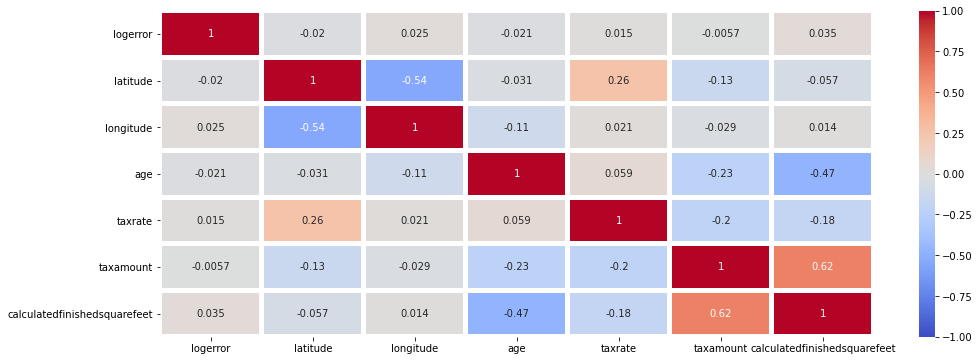

In [12]:
plt.figure(figsize=(16, 6))
sns.heatmap(train[['logerror','latitude', 'longitude', 'age', 'taxrate', 'taxamount',
'calculatedfinishedsquarefeet']].corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True, 
            center=0, linewidths=4)

p0 = 761k = e
p1 = 135k = b
p2 = 173k = c
p3 = 269k = d
p4 = 105k = a



In [ ]:
#pd.set_option(‘display.float_format’, lambda x: ‘%.5f’ % x)

S0 - 1600 - .19 - 1.9
S1 - 1450 - .18 - 3.9
S2 - 1750 - .27 - 4.4
S3 - 3550 - .41 - 2.8
S4 - 3540 - .44 - 1.0
S5 - 2504 - .25 - 
S6 - 1050 - .15


In [13]:
X_train[['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount', 'landtaxvaluedollarcnt']].describe()

,structuretaxvaluedollarcnt,taxvaluedollarcnt,taxamount,landtaxvaluedollarcnt
count,3.638400e+04,3.638400e+04,36384.000000,3.638400e+04
mean,1.846738e+05,4.939048e+05,6017.938172,3.092310e+05
std,1.917262e+05,5.005596e+05,5787.583057,3.596526e+05
min,1.480000e+02,1.050400e+04,49.180000,3.080000e+03
25%,7.678850e+04,1.925020e+05,2638.707500,7.535350e+04
50%,1.300000e+05,3.688995e+05,4581.425000,2.167460e+05
75%,2.200000e+05,6.073102e+05,7205.715000,4.032125e+05
max,3.097672e+06,4.993132e+06,72122.200000,4.847224e+06


In [14]:
X_train.columns

Index(['Unnamed: 0', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'regionidcity', 'regionidcounty', 'regionidzip',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'county', 'age', 'age_bin',
       'taxrate', 'acres', 'acres_bin', 'sqft_bin',
       'structure_dollar_per_sqft', 'structure_dollar_sqft_bin',
       'land_dollar_per_sqft', 'lot_dollar_sqft_bin', 'bath_bed_ratio', 'cola',
       'logerror_bins', 'baseline', 'scaled_latitude', 'scaled_longitude',
       'scaled_bathroomcnt', 'scaled_taxrate', 'scaled_bedroomcnt',
       'scaled_lotsizesquarefeet', 'scaled_age', 'scaled_acres',
       'scaled_bath_bed_ratio', 'scaled_calculatedfinishedsquarefeet',
       'area_cluster', 'size_cluster', 'price_cluster',
       'area_cluster_la_newer', 'area_cluster_la_older',
       'area_cluster_northwest_costal', 'area_cluster_pa

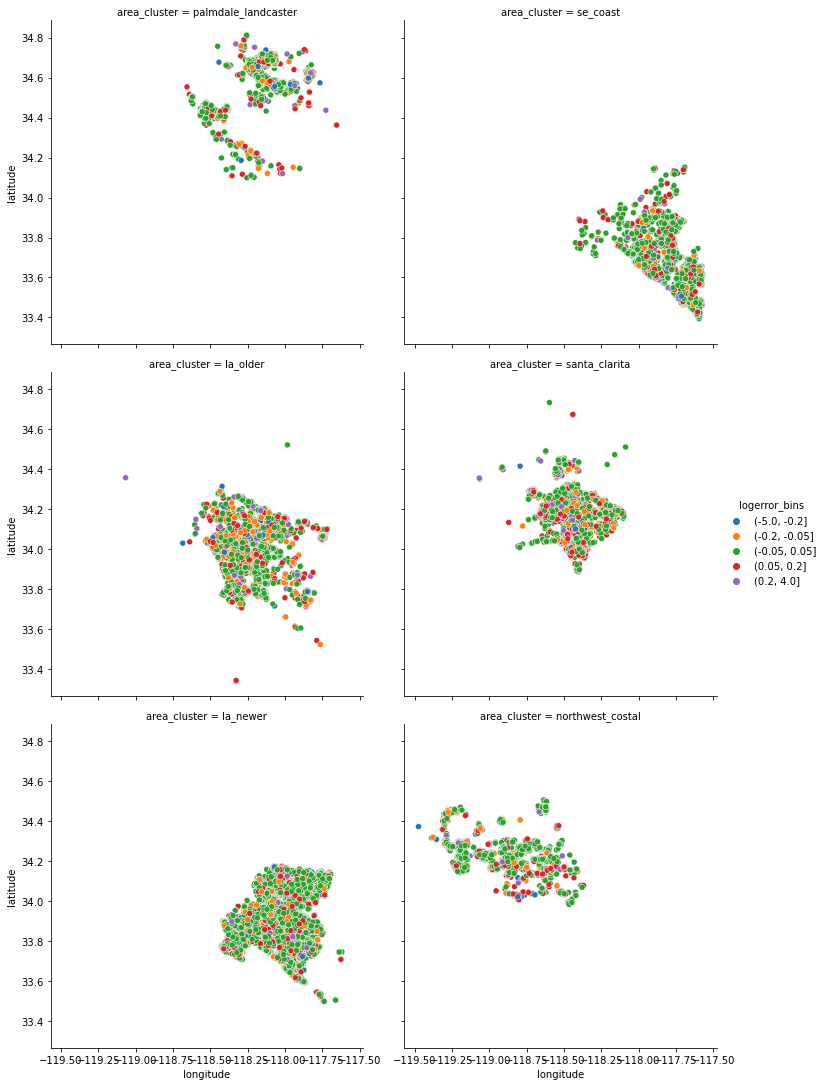

In [15]:
sns.relplot(data=X_train, x="longitude", y="latitude", col="area_cluster", hue = 'logerror_bins', col_wrap=2)
            #col_wrap=2)

    
#significant overlap between C3 and C4

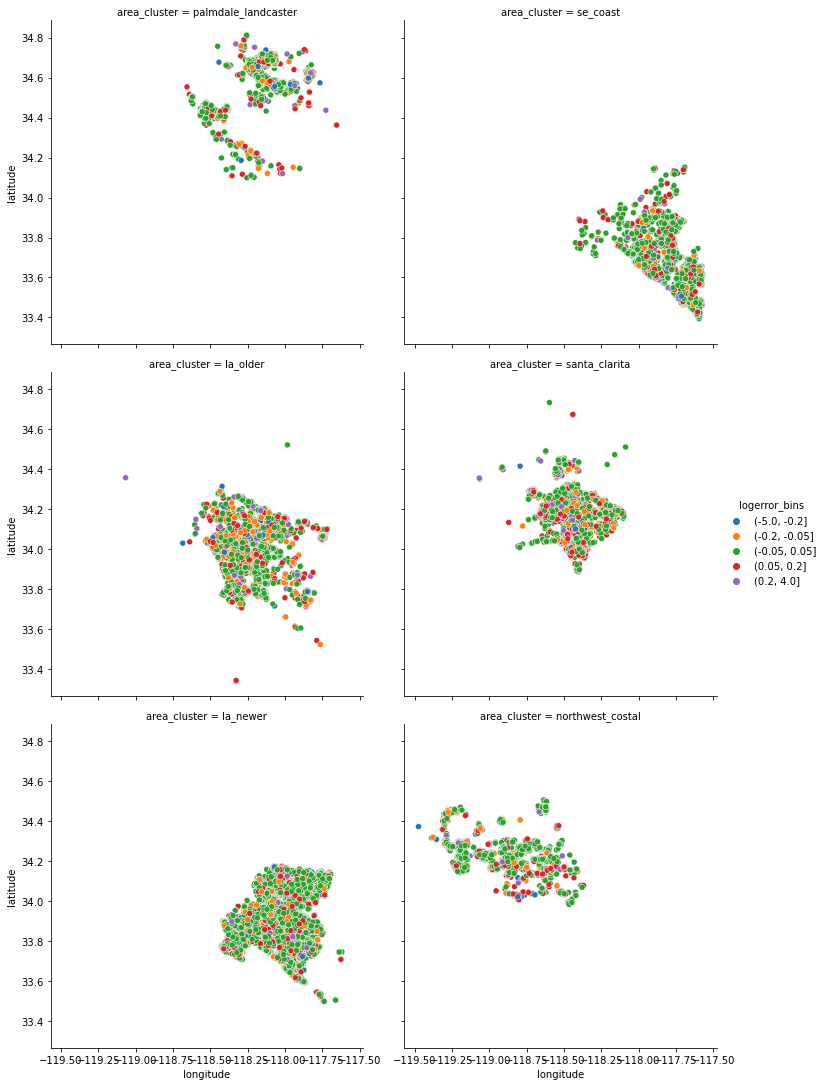

In [16]:
sns.relplot(data=X_train, x="longitude", y="latitude", col="area_cluster", hue = 'logerror_bins', col_wrap=2)


In [17]:
c3  = X_train[X_train['area_cluster']==3]
c4 = X_train[X_train['area_cluster']==4]

In [ ]:
#c3['age'].describe()

In [ ]:
#c4[['age', 'fips']].describe()

In [18]:
train.head()

,Unnamed: 0,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline
21580,21580,11204960,-0.015033,3.0,4.0,2000.0,6037.0,34.561695,-118.082751,6999.0,40227.0,3101.0,97328.0,1987.0,104877.0,131090.0,26213.0,2623.93,Los_Angeles,30.0,0.200,2.001625,0.160675,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913
32781,32781,14323862,0.158456,6.0,6.0,7393.0,6059.0,33.601524,-117.845231,24000.0,40009.0,1286.0,96975.0,1995.0,1556016.0,2449943.0,893927.0,29921.84,Orange,22.0,0.200,1.221328,0.550964,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913
33161,33161,12205584,-0.017737,2.0,3.0,1778.0,6037.0,33.966002,-118.298627,4948.0,12447.0,3101.0,96025.0,1936.0,87000.0,347000.0,260000.0,4248.21,Los_Angeles,81.0,0.600,1.224268,0.113590,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913
45785,45785,12078527,0.066846,3.0,4.0,2777.0,6037.0,34.166013,-118.218530,9989.0,45457.0,3101.0,96327.0,1990.0,322342.0,875355.0,553013.0,9603.39,Los_Angeles,27.0,0.200,1.097085,0.229316,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913
45820,45820,14266520,-0.022133,3.0,4.0,1939.0,6059.0,33.706702,-117.898677,6028.0,47568.0,1286.0,97004.0,1971.0,139321.0,327623.0,188302.0,3923.98,Orange,46.0,0.333,1.197712,0.138384,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913


In [19]:
c4.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parcelid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathroomcnt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedroomcnt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculatedfinishedsquarefeet,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fips,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lotsizesquarefeet,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regionidcity,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
train.logerror_bins.value_counts()

(-0.05, 0.05]    23495
(0.05, 0.2]       5986
(-0.2, -0.05]     4385
(0.2, 4.0]        1646
(-5.0, -0.2]       872
Name: logerror_bins, dtype: int64

In [ ]:
# X_train['area_cluster'] = X_train.area_cluster.map({
#     0: "santa_clarita",
#     1: "se_coast",
#     2: "palmdale_landcaster",
#     3: "la_older",
#     4: "la_newer",
#     5: "northwest_costal"
# })

# X_train.head()

In [ ]:
# dummy_df = pd.get_dummies(X_train[['area_cluster', 'size_cluster', 'price_cluster']], drop_first = False)
# X_train = pd.concat([X_train, dummy_df], axis = 1)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [21]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,36384.0,2.623764e+04,1.516433e+04,0.000000e+00,1.310325e+04,2.621250e+04,3.938825e+04,5.244100e+04
parcelid,36384.0,1.297566e+07,2.349274e+06,1.071186e+07,1.153104e+07,1.259795e+07,1.413677e+07,1.629608e+08
bathroomcnt,36384.0,2.274035e+00,9.592325e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
bedroomcnt,36384.0,3.293838e+00,9.071688e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00
calculatedfinishedsquarefeet,36384.0,1.887357e+03,9.070222e+02,3.600000e+02,1.264000e+03,1.646000e+03,2.276000e+03,9.848000e+03
fips,36384.0,6.049313e+03,2.119832e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,36384.0,3.402001e+01,2.723386e-01,3.334085e+01,3.382584e+01,3.401901e+01,3.418583e+01,3.481240e+01
longitude,36384.0,-1.181933e+02,3.562957e-01,-1.194753e+02,-1.183959e+02,-1.181510e+02,-1.179290e+02,-1.175723e+02
lotsizesquarefeet,36384.0,9.687470e+03,1.946938e+04,2.360000e+02,5.566750e+03,6.821000e+03,8.720000e+03,7.665700e+05
regionidcity,36384.0,3.378487e+04,4.994592e+04,3.491000e+03,1.244700e+04,2.481200e+04,4.022700e+04,3.965560e+05


In [ ]:
#pd.set_option(‘display.float_format’, lambda x: ‘%.5f’ % x)

In [22]:
X_train.baseline.value_counts()

0.017913    36384
Name: baseline, dtype: int64

<AxesSubplot:xlabel='taxamount', ylabel='scaled_calculatedfinishedsquarefeet'>

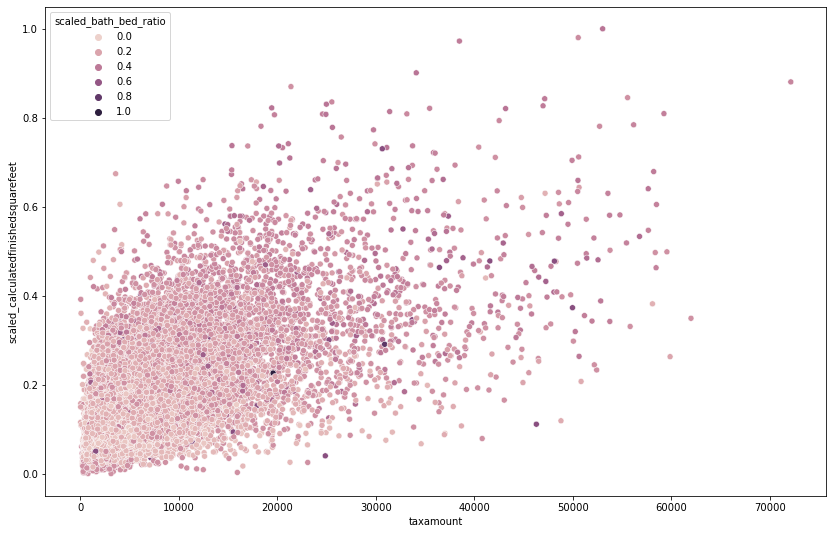

In [23]:
plt.figure(figsize=(14, 9))
sns.scatterplot(data = X_train, x='taxamount', y='scaled_calculatedfinishedsquarefeet', hue='scaled_bath_bed_ratio')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

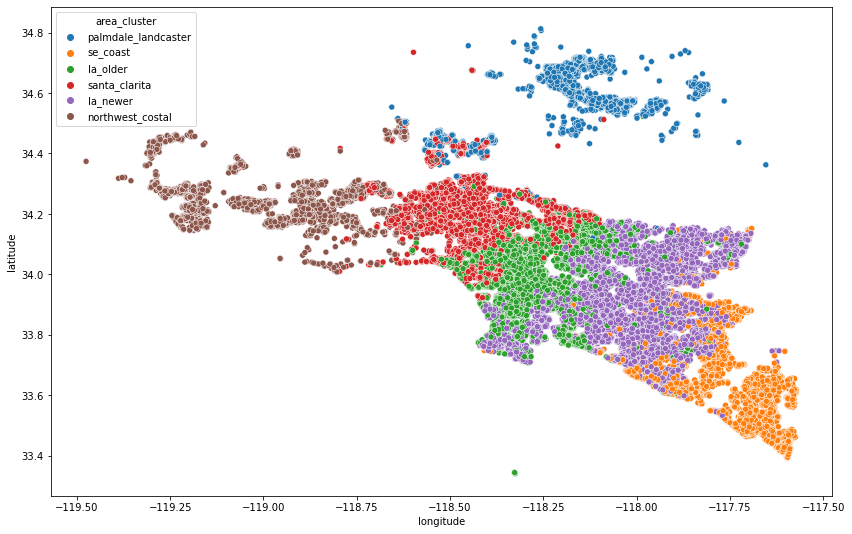

In [24]:
plt.figure(figsize=(14, 9))
sns.scatterplot(data = X_train, x='longitude', y='latitude', hue = 'area_cluster')

#centroids.plot.scatter()
#centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')


In [ ]:
# if we use clusters as features we need to one_hot_encode_them

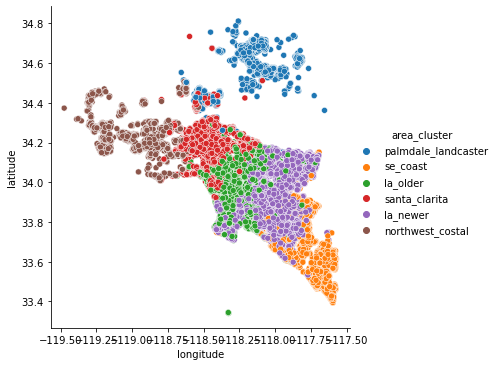

In [25]:
sns.relplot(data = X_train, x='longitude', y='latitude', hue = 'area_cluster')

Understanding our clusters:

In [ ]:
#     k = 6
#     cluster_vars = ['scaled_latitude', 'scaled_longitude', 'age_bin']
#     cluster_name = 'area_cluster'
#     kmeans = create_clusters(X_train, k, cluster_vars)
#     centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)
#     X_train['area_cluster'] = kmeans.predict(X_train[cluster_vars])
#     X_validate['area_cluster'] = kmeans.predict(X_validate[cluster_vars])

In [ ]:
train.head()

In [ ]:
train['latitude', 'longitude', 'age'].groupby('logerror').mean()

In [ ]:
train['latitude', 'longitude', 'age'].groupby('logerror').mean()

In [ ]:
train.groupby(['latitude', 'longitude', 'age']).logerror.mean()

In [ ]:
X_train['baseline'].mean()

In [ ]:

cluster1 = train.groupby(by=['latitude', 'longitude', 'age']).logerror.mean()
cluster1.mean()

In [ ]:
cluster2 = train.groupby(by= ['bathroomcnt', 'sqft_bin', 'acres_bin', 'bath_bed_ratio']).logerror.mean()
cluster2.mean()

In [ ]:
cluster3 = train.groupby(by=['taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']).logerror.mean()
cluster3.mean()

In [ ]:
# k = 7
# cluster_name = 'size_cluster'
# cluster_vars = ['scaled_bathroomcnt',
#                     'sqft_bin', 'acres_bin', 'bath_bed_ratio']

In [ ]:
# k = 5
# cluster_name = 'price_cluster'
# cluster_vars = ['taxrate',
#                     'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']

In [ ]:
train.baseline.value_counts()

In [ ]:
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [ ]:
#turning into dataframe
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [ ]:
X_validate.columns

In [ ]:
# # create & fit model:
# lm = LinearRegression(normalize=True)
# lm.fit(X_validate, y_validate['logerror'])
# #evaluate rmse for train and validate:
# y_train['ols_yhat'] = lm.predict(X_train)
# rmse_train = mean_squared_error(y_train.tax_value, y_train['ols_yhat'])**(1/2)
# y_validate['ols_yhat'] = lm.predict(X_validate)
# rmse_validate = mean_squared_error(y_validate.tax_value, y_validate['ols_yhat'])**(1/2)

# print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
#       "\nValidation/Out-of-Sample: ", rmse_validate)


In [ ]:
validate.sort_values

In [ ]:
plot_clusters('longitude', 'latitude', 'area_cluster', X_train, centroids)

In [ ]:
def split_xy(train, validate, test):
    '''
    Splits dataframe into train, validate, and test data frames
    '''
    X_train = train.drop(columns='logerror')
    y_train = train.logerror

    X_validate = validate.drop(columns='logerror')
    y_validate = validate.logerror

    X_test = test.drop(columns='logerror')
    y_test = test.logerror
# 
    return train, X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:
def scale(X_train, X_validate, X_test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    scaled_vars = ['latitude', 'longitude', 'bathroomcnt', 'taxrate', 'bedroomcnt',
                   'lotsizesquarefeet', 'age', 'acres',  'bath_bed_ratio', 'calculatedfinishedsquarefeet']
    scaled_column_names = ['scaled_' + i for i in scaled_vars]
    #num_vars = list(X_train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
    X_train[scaled_column_names] = scaler.fit_transform(X_train[scaled_vars])
    X_validate[scaled_column_names] = scaler.transform(X_validate[scaled_vars])
    X_test[scaled_column_names] = scaler.transform(X_test[scaled_vars])
    return X_train, X_validate, X_test

In [ ]:
sns.relplot(data=X_train, x="longitude", y="latitude", col="area_cluster", hue = 'logerror_bins', col_wrap=2)
            #col_wrap=2)

In [39]:
#from sklearn.feature_selection import SelectKBest, f_regression



X = tips[['total_bill', 'size', 'tip_percentage', 'price_per_person']]
#target
y = tips.tip

#Initialize - top two features
f_selector = SelectKBest(f_regression, k=2)
#fit the object - find top 2 X's correlated with y
f_selector.fit(X, y)
#boolean mask of whether the column was selected or not
f_mask = f_selector.get_support()
#get list of 2 K features
f_feature = X.iloc[:,f_mask].columns.tolist()

f_feature

NameError: name 'tips' is not defined

In [40]:
train.head()

,Unnamed: 0,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline
21580,21580,11204960,-0.015033,3.0,4.0,2000.0,6037.0,34.561695,-118.082751,6999.0,40227.0,3101.0,97328.0,1987.0,104877.0,131090.0,26213.0,2623.93,Los_Angeles,30.0,0.200,2.001625,0.160675,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913
32781,32781,14323862,0.158456,6.0,6.0,7393.0,6059.0,33.601524,-117.845231,24000.0,40009.0,1286.0,96975.0,1995.0,1556016.0,2449943.0,893927.0,29921.84,Orange,22.0,0.200,1.221328,0.550964,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913
33161,33161,12205584,-0.017737,2.0,3.0,1778.0,6037.0,33.966002,-118.298627,4948.0,12447.0,3101.0,96025.0,1936.0,87000.0,347000.0,260000.0,4248.21,Los_Angeles,81.0,0.600,1.224268,0.113590,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913
45785,45785,12078527,0.066846,3.0,4.0,2777.0,6037.0,34.166013,-118.218530,9989.0,45457.0,3101.0,96327.0,1990.0,322342.0,875355.0,553013.0,9603.39,Los_Angeles,27.0,0.200,1.097085,0.229316,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913
45820,45820,14266520,-0.022133,3.0,4.0,1939.0,6059.0,33.706702,-117.898677,6028.0,47568.0,1286.0,97004.0,1971.0,139321.0,327623.0,188302.0,3923.98,Orange,46.0,0.333,1.197712,0.138384,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913


In [50]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE

In [52]:
f1 = train[['taxamount', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt']]

In [49]:
f1 = train[[‘taxamount’, ‘taxvaluedollarcnt’, ‘structuretaxvaluedollarcnt’, ‘landtaxvaluedollarcnt’]]


SyntaxError: invalid character in identifier (<ipython-input-49-00d02b3d96b0>, line 1)

In [67]:
#my_type = 'float64'

train.dtypes

Unnamed: 0                         int64
parcelid                           int64
logerror                         float64
bathroomcnt                      float64
bedroomcnt                       float64
calculatedfinishedsquarefeet     float64
fips                             float64
latitude                         float64
longitude                        float64
lotsizesquarefeet                float64
regionidcity                     float64
regionidcounty                   float64
regionidzip                      float64
yearbuilt                        float64
structuretaxvaluedollarcnt       float64
taxvaluedollarcnt                float64
landtaxvaluedollarcnt            float64
taxamount                        float64
county                            object
age                              float64
age_bin                          float64
taxrate                          float64
acres                            float64
acres_bin                        float64
sqft_bin        

In [66]:
'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', ''

Unnamed: 0                      False
parcelid                        False
logerror                         True
bathroomcnt                      True
bedroomcnt                       True
calculatedfinishedsquarefeet     True
fips                             True
latitude                         True
longitude                        True
lotsizesquarefeet                True
regionidcity                     True
regionidcounty                   True
regionidzip                      True
yearbuilt                        True
structuretaxvaluedollarcnt       True
taxvaluedollarcnt                True
landtaxvaluedollarcnt            True
taxamount                        True
county                          False
age                              True
age_bin                          True
taxrate                          True
acres                            True
acres_bin                        True
sqft_bin                         True
structure_dollar_per_sqft        True
structure_do

In [56]:
X = f1
y = train.logerror

#Initialize - top two features
f_selector = SelectKBest(f_regression, k=4)
#fit the object - find top 2 X's correlated with y
f_selector.fit(X, y)
#boolean mask of whether the column was selected or not
f_mask = f_selector.get_support()
#get list of 2 K features
f_feature = X.iloc[:,f_mask].columns.tolist()

f_feature

['taxamount',
 'taxvaluedollarcnt',
 'structuretaxvaluedollarcnt',
 'landtaxvaluedollarcnt']

In [38]:
train.head()

,Unnamed: 0,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline
21580,21580,11204960,-0.015033,3.0,4.0,2000.0,6037.0,34.561695,-118.082751,6999.0,40227.0,3101.0,97328.0,1987.0,104877.0,131090.0,26213.0,2623.93,Los_Angeles,30.0,0.200,2.001625,0.160675,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913
32781,32781,14323862,0.158456,6.0,6.0,7393.0,6059.0,33.601524,-117.845231,24000.0,40009.0,1286.0,96975.0,1995.0,1556016.0,2449943.0,893927.0,29921.84,Orange,22.0,0.200,1.221328,0.550964,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913
33161,33161,12205584,-0.017737,2.0,3.0,1778.0,6037.0,33.966002,-118.298627,4948.0,12447.0,3101.0,96025.0,1936.0,87000.0,347000.0,260000.0,4248.21,Los_Angeles,81.0,0.600,1.224268,0.113590,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913
45785,45785,12078527,0.066846,3.0,4.0,2777.0,6037.0,34.166013,-118.218530,9989.0,45457.0,3101.0,96327.0,1990.0,322342.0,875355.0,553013.0,9603.39,Los_Angeles,27.0,0.200,1.097085,0.229316,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913
45820,45820,14266520,-0.022133,3.0,4.0,1939.0,6059.0,33.706702,-117.898677,6028.0,47568.0,1286.0,97004.0,1971.0,139321.0,327623.0,188302.0,3923.98,Orange,46.0,0.333,1.197712,0.138384,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913


In [26]:
features = X_train[['area_cluster_la_newer', 'area_cluster_la_older', 'area_cluster_northwest_costal', 'area_cluster_palmdale_landcaster', 
  'area_cluster_santa_clarita', 'area_cluster_se_coast', 'size_cluster_a', 'size_cluster_b', 'size_cluster_c', 'size_cluster_d',
  'size_cluster_e', 'size_cluster_f', 'size_cluster_g', 'price_cluster_a', 'price_cluster_b', 'price_cluster_c',
  'price_cluster_d', 'price_cluster_e'
 ]]

In [60]:
X = features
y = train.logerror

#Initialize - top two features
f_selector = SelectKBest(f_regression, k=15)
#fit the object - find top 2 X's correlated with y
f_selector.fit(X, y)
#boolean mask of whether the column was selected or not
f_mask = f_selector.get_support()
#get list of 2 K features
f_feature = X.iloc[:,f_mask].columns.tolist()

f_feature

['area_cluster_la_newer',
 'area_cluster_la_older',
 'area_cluster_palmdale_landcaster',
 'area_cluster_santa_clarita',
 'area_cluster_se_coast',
 'size_cluster_a',
 'size_cluster_b',
 'size_cluster_c',
 'size_cluster_d',
 'size_cluster_f',
 'size_cluster_g',
 'price_cluster_a',
 'price_cluster_b',
 'price_cluster_d',
 'price_cluster_e']

In [27]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36384 entries, 21580 to 14306
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   area_cluster_la_newer             36384 non-null  uint8
 1   area_cluster_la_older             36384 non-null  uint8
 2   area_cluster_northwest_costal     36384 non-null  uint8
 3   area_cluster_palmdale_landcaster  36384 non-null  uint8
 4   area_cluster_santa_clarita        36384 non-null  uint8
 5   area_cluster_se_coast             36384 non-null  uint8
 6   size_cluster_a                    36384 non-null  uint8
 7   size_cluster_b                    36384 non-null  uint8
 8   size_cluster_c                    36384 non-null  uint8
 9   size_cluster_d                    36384 non-null  uint8
 10  size_cluster_e                    36384 non-null  uint8
 11  size_cluster_f                    36384 non-null  uint8
 12  size_cluster_g              

In [29]:
features1 = train[['latitude', 'longitude', 'age', 'taxrate', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin']]

In [32]:
features1 = features1.astype(bool)

In [34]:
X_train11 = train[features1]
y_train11 = train.logerror

In [35]:
X_validate.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,county,age,age_bin,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,baseline,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet,area_cluster,size_cluster,price_cluster,area_cluster_la_newer,area_cluster_la_older,area_cluster_northwest_costal,area_cluster_palmdale_landcaster,area_cluster_santa_clarita,area_cluster_se_coast,size_cluster_a,size_cluster_b,size_cluster_c,size_cluster_d,size_cluster_e,size_cluster_f,size_cluster_g,price_cluster_a,price_cluster_b,price_cluster_c,price_cluster_d,price_cluster_e
20430,20430,11304460,3.0,4.0,2334.0,6037.0,34.687739,-118.184182,6631.0,5534.0,3101.0,97319.0,1990.0,173161.0,216450.0,43289.0,3463.67,Los_Angeles,27.0,0.200,1.600217,0.152227,0.2,0.5,74.190660,0.2,6.528276,0.2,0.750000,0,0.017913,0.915288,0.678472,0.333333,0.162402,0.500000,0.008345,0.191176,0.008345,0.196429,0.208052,palmdale_landcaster,f,c,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
36350,36350,14260987,2.0,4.0,1361.0,6059.0,33.729501,-117.905911,7800.0,47568.0,1286.0,97004.0,1960.0,62078.0,382037.0,319959.0,4531.62,Orange,57.0,0.400,1.186173,0.179063,0.2,0.3,45.612050,0.1,41.020385,0.3,0.500000,0,0.017913,0.264110,0.824705,0.166667,0.120134,0.500000,0.009870,0.411765,0.009870,0.107143,0.105502,la_newer,c,d,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
24457,24457,14066920,2.5,4.0,1840.0,6059.0,33.710168,-118.023301,6305.0,25218.0,1286.0,96967.0,1965.0,126210.0,711616.0,585406.0,7920.96,Orange,52.0,0.400,1.113095,0.144743,0.1,0.4,68.592391,0.2,92.847898,0.4,0.625000,0,0.017913,0.250972,0.763016,0.250000,0.112674,0.500000,0.007920,0.375000,0.007920,0.151786,0.155987,la_newer,b,a,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
47718,47718,11236044,2.0,3.0,1244.0,6037.0,34.544534,-118.070681,7040.0,40227.0,3101.0,97328.0,1993.0,114200.0,199000.0,84800.0,3453.14,Los_Angeles,24.0,0.200,1.735246,0.161616,0.2,0.2,91.800643,0.3,12.045455,0.2,0.666667,0,0.017913,0.817972,0.738118,0.166667,0.176186,0.333333,0.008879,0.169118,0.008879,0.166667,0.093170,palmdale_landcaster,b,c,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
46236,46236,11317435,3.0,4.0,2200.0,6037.0,34.680030,-118.243096,7759.0,5534.0,3101.0,97319.0,2005.0,204300.0,273000.0,68700.0,4280.00,Los_Angeles,12.0,0.133,1.567766,0.178122,0.2,0.5,92.863636,0.3,8.854234,0.2,0.750000,0,0.017913,0.910049,0.647512,0.333333,0.159089,0.500000,0.009817,0.080882,0.009817,0.196429,0.193929,palmdale_landcaster,f,c,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [36]:
#setting clusters for modeling
#model1 = [['area_cluster', 'size_cluster', 'price_cluster']]



X_train1 = train[features1]
y_train1 = train.logerror

X_validate1 = X_validate[features1]
y_train1 = y_validate.logerror

#don't need
#X_test1 = X_test[['area_cluster', 'size_cluster', 'price_cluster']]
#y_test1 = test.logerror

#turning y_train and y_validate to dataframes
y_train1 = pd.DataFrame(y_train)
y_validate1 = pd.DataFrame(y_validate)

#
# #tax_value mean
# logerror_pred_mean = y_train1['loggerror'].mean()
# y_train1['logerror_pred_mean'] = logerror_pred_mean
# y_validate1['logerror_pred_mean'] = logerror_pred_mean

# #RMSE of tax_value_pred_mean
# rmse_train_mean = mean_squared_error(y_train1.logerror, y_train1.logerror_pred_mean)**(1/2)
# rmse_validate_mean = mean_squared_error(y_validate1.logerror, y_validate1.logerror_pred_mean)**(1/2)

AttributeError: 'Series' object has no attribute 'logerror'

In [ ]:
y_train1['logerror'].mean()

In [37]:
#tax_value mean
logerror_pred_mean = y_train1['logerror'].mean()
y_train1['logerror_pred_mean'] = logerror_pred_mean
y_validate1['logerror_pred_mean'] = logerror_pred_mean

#RMSE of tax_value_pred_mean
rmse_train_mean = mean_squared_error(y_train1.logerror, y_train1.logerror_pred_mean)**(1/2)
rmse_validate_mean = mean_squared_error(y_validate1.logerror, y_validate1.logerror_pred_mean)**(1/2)

KeyError: 'logerror'

In [ ]:

#RMSE of tax_value_pred_mean
rmse_train_mean = mean_squared_error(y_train1.logerror, y_train1.logerror_pred_mean)**(1/2)
rmse_validate_mean = mean_squared_error(y_validate1.logerror, y_validate1.logerror_pred_mean)**(1/2)

In [ ]:
1['logerror_pred_mean'] = logerror_pred_mean
y_validate1['logerror_pred_mean'] = logerror_pred_mean

#RMSE of tax_value_pred_mean
rmse_train_mean = mean_squared_error(y_train1.logerror, y_train1.logerror_pred_mean)**(1/2)
rmse_validate_mean = mean_squared_error(y_validate1.logerror, y_validate1.logerror_pred_mean)**(1/2)

In [ ]:
rmse_base = rmse_train_mean

print('             BASELINE')
print('----------------------------------')
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train_mean, 8), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate_mean, 8))
print('----------------------------------')

In [ ]:
# # create & fit model:
# lm = LinearRegression(normalize=True)
# lm.fit(X_validate, y_validate['tax_value'])
# #evaluate rmse for train and validate:
# y_train['ols_yhat'] = lm.predict(X_train)
# rmse_train = mean_squared_error(y_train.tax_value, y_train['ols_yhat'])**(1/2)
# y_validate['ols_yhat'] = lm.predict(X_validate)
# rmse_validate = mean_squared_error(y_validate.tax_value, y_validate['ols_yhat'])**(1/2)

# print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
#       "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
features.head()

In [ ]:
X_validate.head()

In [ ]:
# create & fit model:
lm = LinearRegression(normalize=True)
lm.fit(X_validate1, y_validate1['logerror'])
#evaluate rmse for train and validate:
y_train1['ols_yhat'] = lm.predict(X_train1)
rmse_train = mean_squared_error(y_train1.logerror, y_train1['ols_yhat'])**(1/2)
y_validate1['ols_yhat'] = lm.predict(X_validate1)
rmse_validate = mean_squared_error(y_validate1.logerror, y_validate1['ols_yhat'])**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


## area cluster  = lat, long, age 

### - Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing
### - Exploration: Clustering is used to explore the data. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. At least 3 combinations of features for clustering should be tried.
### - Modeling: At least 4 different models are created and their performance is compared. One model is the distinct combination of algorithm, hyperparameters, and features.